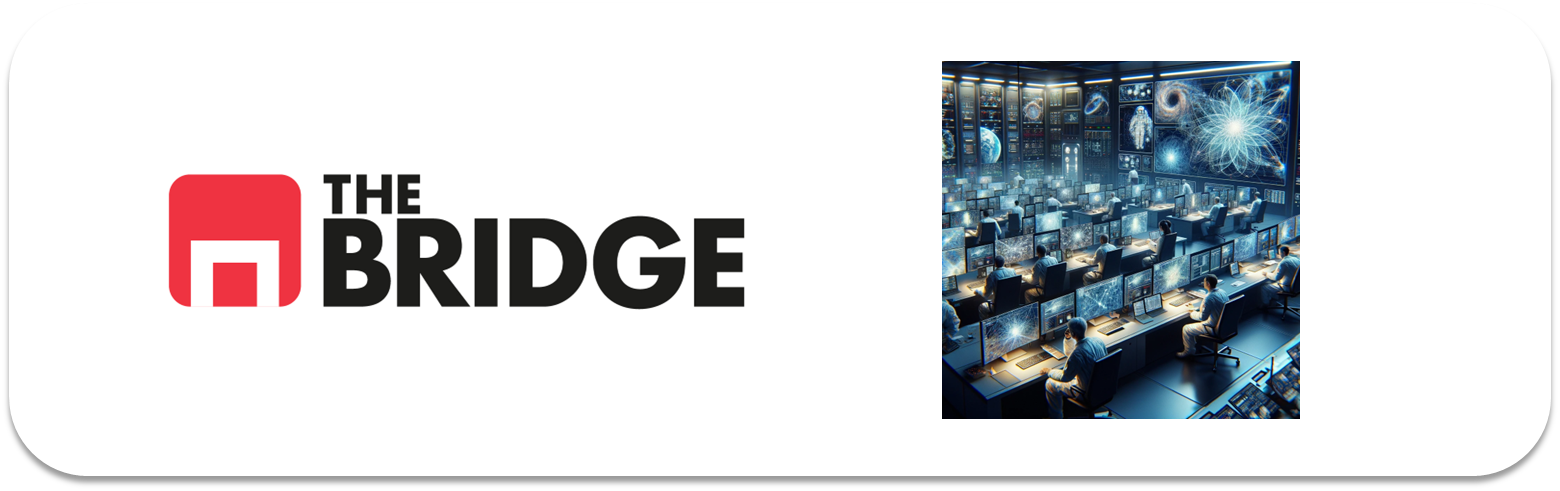

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



Datos de entrenamiento: (4000, 32, 32, 3), (4000, 2)
Datos de prueba: (1000, 32, 32, 3), (1000, 2)


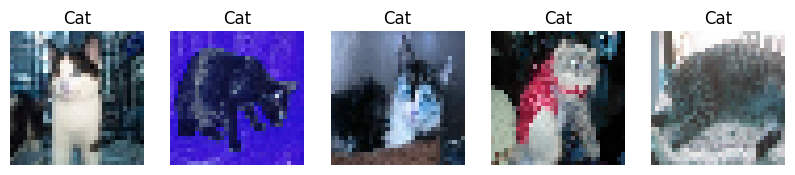

Epoch 1/15


c:\Users\alber\anaconda3\envs\Mapache\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5232 - loss: 0.7045 - val_accuracy: 0.6430 - val_loss: 0.6752
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6057 - loss: 0.6650 - val_accuracy: 0.6460 - val_loss: 0.6301
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6470 - loss: 0.6214 - val_accuracy: 0.6850 - val_loss: 0.5873
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6901 - loss: 0.5868 - val_accuracy: 0.6640 - val_loss: 0.6077
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7292 - loss: 0.5379 - val_accuracy: 0.6850 - val_loss: 0.5779
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7697 - loss: 0.4844 - val_accuracy: 0.7330 - val_loss: 0.5382
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7880 - loss: 0.4619 - val_accuracy: 0.7420 - val_loss: 0.5321
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8183 - loss: 0.4122 - val_accuracy: 0.745

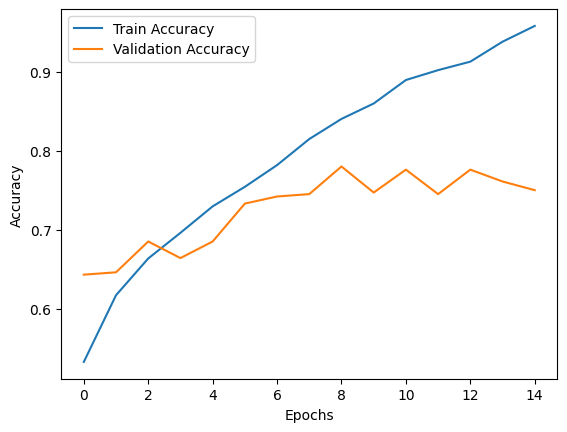

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


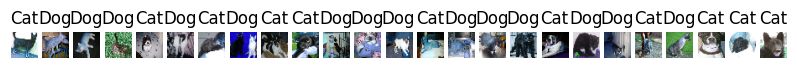


Reporte de Clasificación:
              precision    recall  f1-score   support

         Cat       0.77      0.72      0.74       500
         Dog       0.73      0.78      0.76       500

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



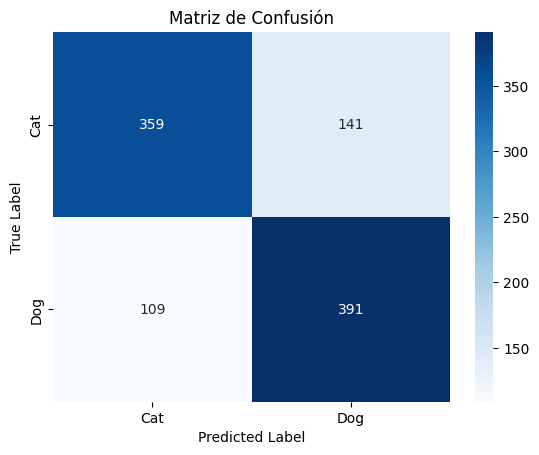

In [15]:
def load_images_from_directory(directory):
    X, y = [], []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (32, 32))  # Redimensionar a 32x32
            img = img / 255.0  # Normalizar valores entre 0 y 1
            X.append(img)
            
            # Obtener la etiqueta desde el nombre del archivo (asumiendo "dog" o "cat" en el nombre)
            label = 1 if "dog" in filename.lower() else 0
            y.append(label)
    
    return np.array(X), np.array(y)

# Definir los directorios de entrenamiento
directories_train = ["data/github_train_0", "data/github_train_1", "data/github_train_2", "data/github_train_3"]

# Cargar datos de entrenamiento
X_train, y_train = [], []
for directory in directories_train:
    X, y = load_images_from_directory(directory)
    X_train.append(X)
    y_train.append(y)

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

# Cargar datos de prueba
test_directory = "data/github_test"
X_test, y_test = load_images_from_directory(test_directory)

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

# Visualización de algunas imágenes
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i])
    ax.set_title("Dog" if np.argmax(y_train[i]) == 1 else "Cat")
    ax.axis("off")
plt.show()

# Construcción del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
epochs = 15
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=32)

# Visualización del rendimiento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluación del modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Identificar las predicciones incorrectas
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Calcular las probabilidades de las clases para las imágenes mal clasificadas
incorrect_probs = y_pred[incorrect_indices]

# Para las imágenes mal clasificadas, obtener la probabilidad de la clase incorrecta
# Si es un perro clasificado como gato, seleccionamos la probabilidad de "perro"
# Si es un gato clasificado como perro, seleccionamos la probabilidad de "gato"
incorrect_confidences = np.max(incorrect_probs, axis=1)

# Ordenar las imágenes mal clasificadas por la probabilidad más alta de ser incorrecta
sorted_indices = incorrect_indices[np.argsort(incorrect_confidences)[::-1]]

# Seleccionar el 10% de las imágenes mal clasificadas con mayor confianza
num_selected = int(0.1 * len(sorted_indices))
selected_indices = sorted_indices[:num_selected]

# Visualizar las imágenes seleccionadas
fig, axes = plt.subplots(1, num_selected, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[selected_indices[i]])
    ax.set_title("Dog" if np.argmax(y_pred[selected_indices[i]]) == 1 else "Cat")
    ax.axis("off")
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_true_classes, y_pred_classes, target_names=["Cat", "Dog"]))

# Matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión")
plt.show()
